In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#Decay constants of radioisotopes involved
λ_Re = np.log(2)/(41.2)
λ_U = np.log(2)/(4.468)
λ_Th = np.log(2)/(14.1)
λ_Rb = np.log(2)/(49.7)

In [ ]:
#To remove warnings after the code has been run to make results clearer
#import warnings
#warnings.filterwarnings("ignore")

# UTh andReOs Clock - Closed box model

In [67]:
#Defining the initial conditions and variables
Λ = [0,999999999,0.5,0.2451] 
N = 10000
t_max = 20
interval = t_max/N
time = np.linspace(0,t_max,N)

In [68]:
#Analytical functions to solve the closed box GCE models 
def ReOs_ratio_calculation(Λ,λ_Re,T):
    ReOs_ratio = []
    for Λ_value in Λ:
        #Special case for if the Λ = 0
        if Λ_value == 0:
            calculation = (λ_Re*T)/(1-np.exp(-λ_Re*T))
        #All other cases
        else:
            calculation = ((Λ_value-λ_Re)/Λ_value)*np.exp(λ_Re*T)*(1-np.exp(-Λ_value*T)) / (1-np.exp(-(Λ_value-λ_Re)*T))
        ReOs_ratio.append(calculation - 1)
    return ReOs_ratio
ReOs_ratio = ReOs_ratio_calculation(Λ,λ_Re,time)

def UTh_ratio_calculation(Λ,λ_U,λ_Th,P_ratio,T):
    UTh_ratio = []
    for Λ_value in Λ:
        U_abundance  = (np.exp(-Λ_value*T)-np.exp(-λ_U*T))  / (λ_U-Λ_value)
        Th_abundance = (np.exp(-Λ_value*T)-np.exp(-λ_Th*T)) / (λ_Th-Λ_value)
        UTh_ratio.append(P_ratio*U_abundance/Th_abundance)
    return UTh_ratio
UTh_ratio_05 = UTh_ratio_calculation(Λ,λ_U,λ_Th,0.5166,time)
UTh_ratio_07 = UTh_ratio_calculation(Λ,λ_U,λ_Th,0.76335,time)


def SrRb_ratio_calculation(Λ,λ_Rb,T):
    SrRb_ratio = []
    for Λ_value in Λ:
        #Special case for if the Λ = 0
        if Λ_value == 0:
            calculation = (λ_Rb*T)/(1-np.exp(-λ_Rb*T))
        #All other cases
        else:
            calculation = ((Λ_value-λ_Rb)/Λ_value)*np.exp(λ_Rb*T)*(1-np.exp(-Λ_value*T)) / (1-np.exp(-(Λ_value-λ_Rb)*T))
        SrRb_ratio.append(calculation - 1)
    return SrRb_ratio
SrRb_ratio = SrRb_ratio_calculation(Λ,λ_Rb,time)

C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


In [95]:
#Calculations of the age ranges for the models:
#ReOs
upper_tick = np.where(ReOs_ratio[1] > 0.13-0.008203)[0][0]
lower_tick = np.where(ReOs_ratio[0] > 0.13+0.008203)[0][0]
print('Age of the universe is between {:2.3f} and {:2.3f}Gyr for the Os/Re clock'.format(time[upper_tick]+4.6,time[lower_tick]+4.6))

#UTh
upper_tick = np.where(UTh_ratio_05[1] < 0.438+0.006)[0][0]
lower_tick = np.where(UTh_ratio_05[0] < 0.438-0.006)[0][0]
print('Age of the universe is between {:2.3f} and {:2.3f}Gyr for the Os/Re clock'.format(time[upper_tick]+4.6,time[lower_tick]+4.6))

#SrRb
upper_tick = np.where(SrRb_ratio[1] > 0.09-0.03)[0][0]
lower_tick = np.where(SrRb_ratio[0] > 0.09+0.03)[0][0]
print('Age of the universe is between {:2.3f} and {:2.3f}Gyr for the Os/Re clock'.format(time[upper_tick]+4.6,time[lower_tick]+4.6))


Age of the universe is between 11.433 and 20.338Gyr for the Os/Re clock
Age of the universe is between 6.030 and 8.196Gyr for the Os/Re clock
Age of the universe is between 8.778 and 21.172Gyr for the Os/Re clock


C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encounter

C:\Users\Spencer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0DAFD430> has a label of '_line3' which cannot be automatically added to the legend.


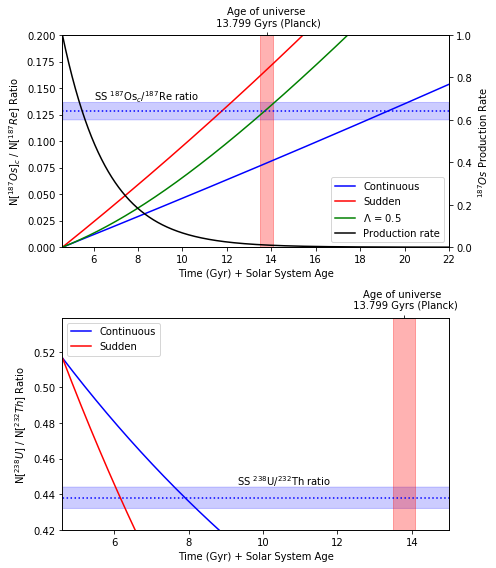

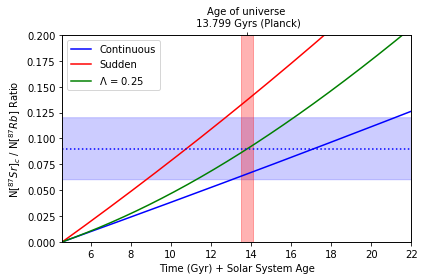

In [97]:
# Plotting the ReOs ratio over time
fig, ax1 = plt.subplots(2,1,figsize=(7,8))
ax2 = ax1[0].twinx() #Creating a second axis
ln1 = ax1[0].plot(time+4.6,ReOs_ratio[0],label='Continuous'      ,color='b')
ln2 = ax1[0].plot(time+4.6,ReOs_ratio[1],label='Sudden'          ,color='r')
ln3 = ax1[0].plot(time+4.6,ReOs_ratio[2],label=r'$\Lambda$ = 0.5',color='g')
ln4 = ax1[0].plot([4.6,22],[0.12868,0.12868],'b:')
ln5 = ax2.plot(time+4.6,np.exp(-0.5*time),label='Production rate',color='k')
x = np.arange(4.6,t_max+2,0.01)
y1 = np.array([0.12868+0.008203]*len(x))
y2 = np.array([0.12868-0.008203]*len(x))
ax1[0].fill_between(x,y2, y1,alpha=0.2, color='b')
ax1[0].axvline(13.799,0,1,color='r',linestyle=':',alpha=1)
ax1[0].set_xlabel('Total Time (Gyr)')
ax1[0].set_ylabel('N$[^{187}Os]_{c}$ / N$[^{187}Re]$ Ratio')
ax2.set_ylabel('$^{187}Os$ Production Rate')
ax1[0].set_xlim([4.6,22])
ax1[0].set_ylim([0,0.2])
ax2.set_ylim([0,1])
lns = ln1+ln2+ln3+ln4+ln5
labs = [l.get_label() for l in lns]
ax1[0].legend(lns, labs,loc='lower right')
ax1[0].text(6,0.138,'SS $^{187}$Os$_{c}$/$^{187}$Re ratio',fontsize=10)
ax2 = ax1[0].twiny()
ax2.set_xticks([0.53])
ax2.set_xticklabels(["Age of universe \n 13.799 Gyrs (Planck)"])
plt.tight_layout()

#Plotting the UTh ratio over time
ax1[1].plot(time+4.6,UTh_ratio_05[0],label='Continuous',color='b')
ax1[1].plot(time+4.6,UTh_ratio_05[1],label='Sudden',color='r')
#ax1[1].plot(time+4.6,UTh_ratio_07[0],label='Continuous',color='r')
#ax1[1].plot(time+4.6,UTh_ratio_07[1],label='Sudden',color='r',linestyle='--')
ax1[1].plot([0,20+4.6],[0.438 ,0.438],'b:')
x = np.arange(0.0,t_max+4.6,0.01)
y1 = np.array([0.438+0.006]*len(x))
y2 = np.array([0.438-0.006]*len(x))
ax1[1].fill_between(x,y2, y1,alpha=0.2, color='b')
ax1[1].axvline(13.799,0,1,color='r',linestyle=':',alpha=1)
ax1[1].set_xlabel('Total Time (Gyr)')
ax1[1].set_ylabel(r'N$[^{238}U]$ / N$[^{232}Th]$ Ratio')
ax1[1].set_xlim(4.6,15)
ax1[1].set_ylim(bottom=0.42)
ax1[1].legend()
ax1[1].text(9.3,0.445,'SS $^{238}$U/$^{232}$Th ratio',fontsize=10)
ax3 = ax1[1].twiny()
ax3.set_xticks([0.884])
ax3.set_xticklabels(["Age of universe \n 13.799 Gyrs (Planck)"])
#ax1[1].text(5.0, 0.665, '$P^{U/Th}$= 0.76', fontsize=12,rotation=-38)
#ax1[1].text(4.8, 0.45, '$P^{U/Th}$= 0.52', fontsize=12,rotation=-28)
plt.tight_layout()

#Plotting the SrRb ratio over time
fig3, ax4 = plt.subplots(1,1,figsize=(6,4))
ax4a = ax4.twinx() #Creating a second axis
ln1 = ax4.plot(time+4.6,SrRb_ratio[0],label='Continuous'      ,color='b')
ln2 = ax4.plot(time+4.6,SrRb_ratio[1],label='Sudden'          ,color='r')
ln3 = ax4.plot(time+4.6,SrRb_ratio[3],label=r'$\Lambda$ = {:2.2f}'.format(Λ[3]),color='g')
ln4 = ax4.plot([4.6,20+4.6],[0.09,0.09],'b:')
ln5 = ax4.plot(time+4.6,np.exp(-0.2451*time),label='Production rate',color='k')
x = np.arange(0.0,t_max+4.6,0.01)
y1 = np.array([0.09+0.03]*len(x))
y2 = np.array([0.09-0.03]*len(x))
ax4.fill_between(x,y2, y1,alpha=0.2, color='b')
ax4.axvline(13.799,0,1,color='r',linestyle=':',alpha=1)
ax4.set_xlabel('Total Time (Gyr)')
ax4.set_ylabel('N$[^{87}Sr]_{c}$ / N$[^{87}Rb]$ Ratio')
ax4.set_xlim([4.6,22])
ax4.set_ylim([0,0.2])
lns = ln1+ln2+ln3+ln4+ln5
labs = [l.get_label() for l in lns]
ax4.legend(lns, labs,loc='lower right')
ax4.legend(loc='upper left')
ax5 = ax4.twiny()
ax5.set_xticks([0.53])
ax5.set_xticklabels(["Age of universe \n 13.799 Gyrs (Planck)"])

plt.tight_layout()
plt.show()

# Comparison of numerical integration to analytical solutions to test the code

In [6]:
#Setting the initial parameters
N = 10000
t_max = 20
interval = t_max/N
time = np.linspace(0,t_max,N)

tau_exp = 4.03
tau_gau = 3.46

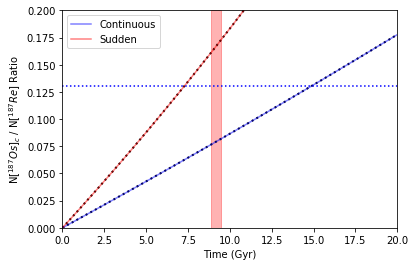

In [7]:
#R-process rate functions
def C_exp(t,tau):
    return np.exp(-t*tau)
C_Gau = lambda t : ((1/np.sqrt(2*np.pi*tau_gau**2)) * np.exp(-((t-tau_gau)**2)/(2*tau_gau**2)))

#Using the same code to create a comparison for the analytical models to the numerical models
N_Re_sudd = []
N_Os_sudd = []
ratio_exp_sudd   = []
N_Re_exp_sudd = 0
N_Os_exp_sudd = 0
N_Re_cont = []
N_Os_cont = []
ratio_exp_cont   = []
N_Re_exp_cont = 0
N_Os_exp_cont = 0
#Starting at time = 0 and then using increments of 0.01
for i in range(int(t_max/interval)):
    i = i*interval
    #Exponential production of Re
    N_Re_exp_sudd += C_exp(i,9999999)*interval - λ_Re*N_Re_exp_sudd*interval
    N_Os_exp_sudd += λ_Re*N_Re_exp_sudd*interval
    if N_Os_exp_sudd == 0:
        ratio_exp_sudd.append(0)
    else:
        ratio_exp_sudd.append(N_Os_exp_sudd/N_Re_exp_sudd)
    
    #Exponential production of Re
    N_Re_exp_cont += C_exp(i,0)*interval - λ_Re*N_Re_exp_cont*interval
    N_Os_exp_cont += λ_Re*N_Re_exp_cont*interval
    if N_Os_exp_cont == 0:
        ratio_exp_cont.append(0)
    else:
        ratio_exp_cont.append(N_Os_exp_cont/N_Re_exp_cont)
    
fig, ax1 = plt.subplots()
ax1.plot(time,ratio_exp_sudd,color='k',linestyle=':',linewidth=2)
ax1.plot(time,ratio_exp_cont,color='k',linestyle=':',linewidth=2)
ax1.plot(time,ReOs_ratio[0],label='Continuous'      ,color='b',alpha=0.5)
ax1.plot(time,ReOs_ratio[1],label='Sudden'          ,color='r',alpha=0.5)
ax1.plot([0,t_max],[0.13,0.13],'b:')
ax1.axvspan(8.9,9.5,0,1,color='r',alpha=0.3)
ax1.set_xlabel('Time (Gyr)')
ax1.set_ylabel('N$[^{187}Os]_{c}$ / N$[^{187}Re]$ Ratio')
ax1.set_xlim([0,t_max])
ax1.set_ylim([0,0.2])
ax1.legend()
plt.show()